In [5]:
import torch
from torch import nn
import random

## Multi-Head Self Attention Implementation

In [ ]:


class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_dim, num_heads):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
    
        # for each head, we create a linear layer for query, key, and value
        self.q_weights = [nn.Linear(hidden_dim, hidden_dim) for _ in range(self.num_heads)]
        self.k_weights = [nn.Linear(hidden_dim, hidden_dim) for _ in range(self.num_heads)]
        self.v_weights = [nn.Linear(hidden_dim, hidden_dim) for _ in range(self.num_heads)]
        
        self.softmax = nn.Softmax(dim = -1) #Don't understand this line
        self.linear = nn.Linear(num_heads*hidden_dim, hidden_dim)

    def forward(self, X):
        for x in X:
            x_result = []
            for head in range(self.num_heads):
                #Applies affine transformation to input matrix x
                q = self.q_weights[head](x)
                k = self.k_weights[head](x)
                v = self.v_weights[head](x)
                h = self.softmax(q @ k.T / self.hidden_dim ** 0.5) @ v
                x_result.append(h)
                
        

## Linear Transformations in Pytorch

In [ ]:
#Pass from a 4 dim input -> 3 dim output
x = torch.randn(4)
print(f'Shape of x: {x.shape}')
print(f'Input x: {x}')


#Affine transformation is carried out by linear layer
linear = nn.Linear(4, 3)
print(f'linear.weight.shape: {linear.weight.shape}')
print(f'linear.weight.T.shape: {linear.weight.T.shape}')

print(f'linear.weight: {linear.weight}')

#y stores the result of the affine transformation
y = linear(x)
print(f'Shape of y: {y.shape}')
print(f'y: {y}') 



$y = linear(x)$-> $xW^t + b$

For this computation $W =$ $\begin{pmatrix}
w_{00} & w_{10} & w_{20} & w_{30} \\
w_{01} & w_{11} & w_{21} & w_{31} \\
w_{02} & w_{12} & w_{22} & w_{32}
\end{pmatrix}$ and $x = [x_0, x_1, x_2, x_3]$ and the vector $W_i$ is $[w_{ki}]$ for $k\in [0,3]$, eg, $W_0 = [w_{00}, w_{10}, w_{20}, w_{30}]$. In addition the bias vector $b$ is $[b_0, b_1, b_2]$ and $W^t$ is $\begin{pmatrix}
w_{00} & w_{01} & w_{02} \\
w_{10} & w_{11} & w_{12} \\
w_{20} & w_{21} & w_{22} \\
w_{30} & w_{31} & w_{32}
\end{pmatrix}$. Note that $W_0^t$ is simply the first column of $W^t$. Pytorch computes the product $xW^t = [x\cdot W_0^t, x\cdot W_1^t, x\cdot W_2^t]$. Adding the bias $b$ gives $$y = xW^t = [x\cdot W_0^t + b_0, x\cdot W_1^t + b_1, x\cdot W_2^t + b_2].$$ In terms of the shapes of the matrices / vectors involved, mathematically, we have: $$(1, 3) = (1, 4)(4, 3) + (1, 3)$$ $$y \quad=x\quad  W^t +\quad b$$ In terms of the pytorch shapes, we have 

$$\text{torch.Size([3]) = torch.Size([4]) torch.Size([4, 3]) + torch.Size([3])}$$ 
$$y\quad\quad = \quad\quad x\quad W^t\quad + b$$

Now suppose that the (mathematical) shape of $x$ were $(2, 4)$, that is, if $x$ were: 
$\begin{pmatrix}
x_{00} & x_{01}  & x_{02} & x_{03} \\
x_{10} & x_{11} & x_{12} & x_{13} 
\end{pmatrix}$. This is equivalent to a torch tensor with shape torch.size([2,4]). If the first row of $x$ is denoted $x_0$ and the second is denoted $x_1$, then we may write the product $y = xW^t +b$ as: $$\begin{pmatrix}
x_0W_{0}^t + b_0 & x_0W^t_{1} + b_1  & x_0W^t_2 +b_2 \\
 x_1 W_0^t+ b_0 & x_1W^t_1 + b_1 & x_1W^t_2 +b_2
\end{pmatrix} = \begin{pmatrix}
x_{00} & x_{01}  & x_{02} & x_{03} \\
x_{10} & x_{11} & x_{12} & x_{13} 
\end{pmatrix} \cdot \begin{pmatrix}
w_{00} & w_{01} & w_{02} \\
w_{10} & w_{11} & w_{12} \\
w_{20} & w_{21} & w_{22} \\
w_{30} & w_{31} & w_{32}
\end{pmatrix} + b.$$ Thus the matrix of weights has shape torch.Size([3,4]) and the input matrix has shape torch.Size([2,4]). Since the transpose of the weight matrix is used, the shapes align as $(2,4) \cdot (4,3) = (2,3)$. The bias matrix $b$ is 'broadcast' among the rows of the product since each element of the row is a dot product of that row's input (a single training example) and weights, thereby representing the input to a node in a higher layer.

## Softmax

In [ ]:

softmax = nn.Softmax(dim = 1)
list = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]

list = torch.tensor(list, dtype=torch.float32)
print(f'Origianl list (as tensor):\n {list}')
softmax_list = softmax(list)
print(f'List after softmax:\n {softmax_list}')

Our list tensor has two dimensions since it is two dimensional. We can select dim = 1 or 0 (or -1 = 1). Applying softmax along dim = 0 applies softmax along columns in our 2d array. Selecting dim = 1 applies softmax along rows.

## How Python Computes Gradients for Backpropagation

Each computation creates a node in an directed acyclic graph. Edges in the graph are the gradients with respect to the inputs to the computation node.

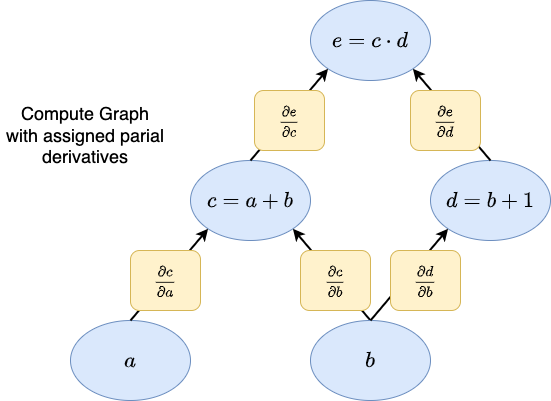

When the gradients are calculuated with respect to outputs, the chain rule can be applied since all gradients are known.

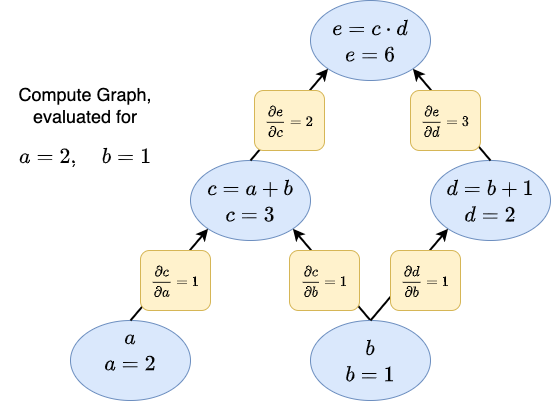

In [5]:
import torch

a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

c = a + b     # c = 3
d = b + 1     # d = 2
e = c * d     # e = 6

e.backward()
print(a.grad)
print(b.grad)

tensor(2.)
tensor(5.)


b.grad evaluates to 5 because $$\frac{\partial e}{\partial b} =\frac{\partial e}{\partial c} \cdot \frac{\partial c}{\partial b}  + \frac{\partial e}{\partial d} \cdot \frac{\partial d}{\partial b}$$ which is just: $$\frac{\partial e}{\partial b}  = 2 \cdot 1 + 3 \cdot 1$$